# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import getFamaFrenchFactors as gff
from datetime import datetime
from dateutil.relativedelta import relativedelta
import os
import portfolio_returns as pr

# Importing Dataset
Here, Just importing the monthly data from the getfamaFrenchFactors as this project focuses on checking the investment returns, through monthly investment with strategic seasonal investment.

In [2]:
monthly_df = gff.famaFrench3Factor(frequency='m')
monthly_df.head()

,date_ff_factors,Mkt-RF,SMB,HML,RF
0,1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1,1926-08-31,0.0264,-0.0117,0.0382,0.0025
2,1926-09-30,0.0036,-0.0140,0.0013,0.0023
3,1926-10-31,-0.0324,-0.0009,0.0070,0.0032
4,1926-11-30,0.0253,-0.0010,-0.0051,0.0031


## Performing Monte Carlo Simulations  
Calutaing the return over 30 years for all possible start months. Along with that if desired, can also get time weighted return over 30 years of period as well as Sharpe ratio. Here, also saving the returns which are basically a numpy array, to avoid calculating it repeatedly. 

In [3]:
overwrite = False # if this is True we can overwrite the files
# Checking if the files exists, and also if we want to overwrite the files or not
if os.path.exists('all_returns.npy') and os.path.exists('ex_summer_returns.npy') and not overwrite:
    all = np.load('all_returns.npy')
    ex_summer = np.load('ex_summer_returns.npy')
    print('Data Loaded From Files')

# If files don't exists calculate everything and save those files
else:
    print('Files Not Found. Calculating Returns ...')
    maximum_start_date = monthly_df.iloc[-1,0] - relativedelta(years=30)
    number_of_samples = len(monthly_df[monthly_df['date_ff_factors'] <= maximum_start_date])
    all = np.zeros((number_of_samples,3))
    ex_summer = np.zeros((number_of_samples,3))

    for i in range(number_of_samples):
        start_date = monthly_df.iloc[i,0]
        print(start_date, end = '\r')
        end_date = pr.calculate_end_date(start_date)
        all[i,0], all[i,1], all[i,2] = pr.return_over_time_period(monthly_df, start_date, end_date)
        ex_summer[i,0], ex_summer[i,1], ex_summer[i,2] = pr.return_over_time_period(monthly_df, start_date, end_date, summer = False)
        
    np.save('all_returns.npy', all)
    np.save('ex_summer_returns.npy', ex_summer)

Data Loaded From Files


# Visualizing Returns
These plots are distribution of outputs of Monte Carlo simulations which selects all possible start months from the dataset, which has a span of 30 years. 
### Distribution of 30 year aggregrate Investment returns

Text(0.5, 1.0, 'Investment Excluding Summer Months')

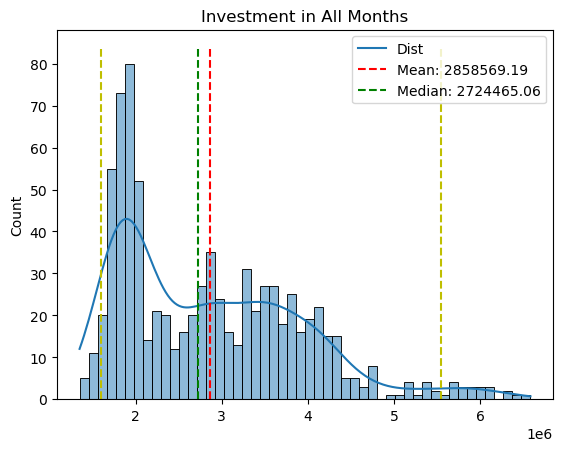

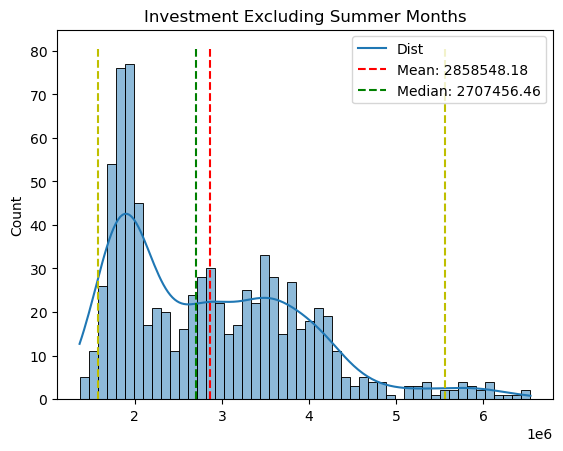

In [5]:
fig, ax = pr.visualization(all[:,1])
ax.set_title('Investment in All Months')
fig, ax = pr.visualization(ex_summer[:,1])
ax.set_title('Investment Excluding Summer Months')

### Distribution of 30 year aggregrate Time Weighted Rate of Return 

Text(0.5, 1.0, 'Time Weighted Return Excluding Summer Months')

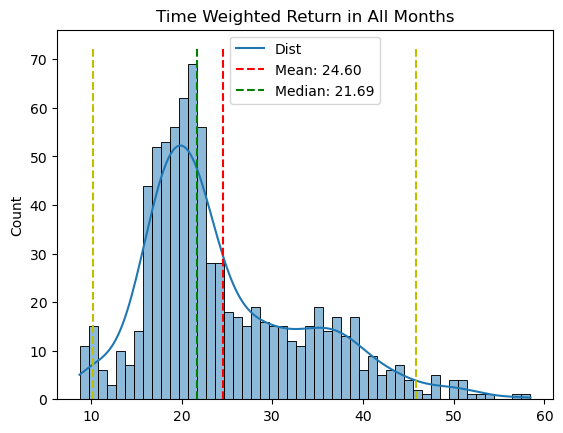

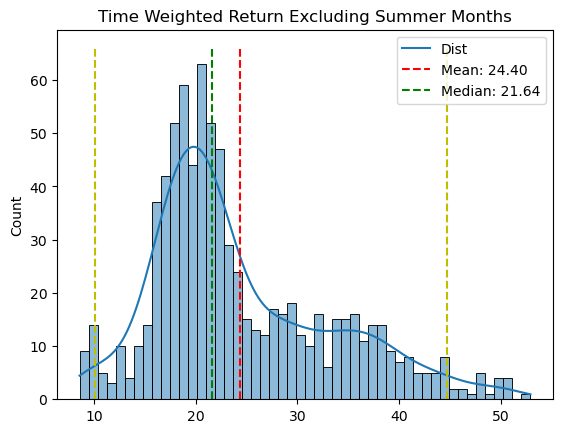

In [6]:
fig, ax = pr.visualization(all[:,0])
ax.set_title('Time Weighted Return in All Months')
fig, ax = pr.visualization(ex_summer[:,0])
ax.set_title('Time Weighted Return Excluding Summer Months')

### Distribution of 30 year aggregrate Sharpe Ratio

Text(0.5, 1.0, 'Sharpe Ratio Excluding Summer Months')

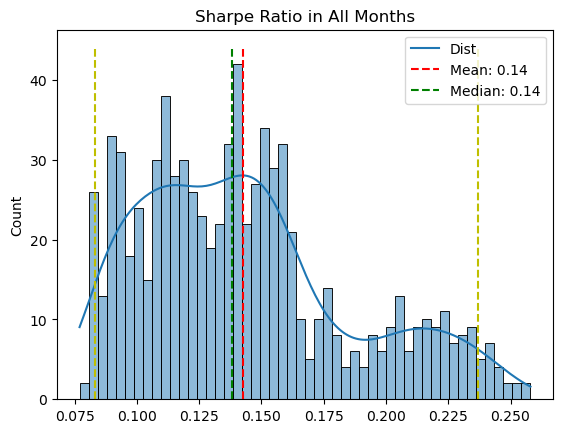

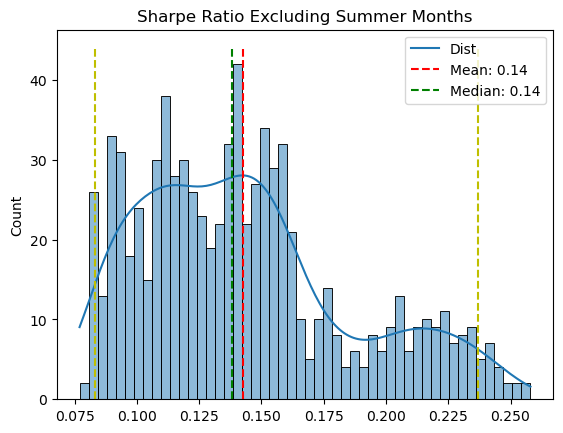

In [7]:
fig, ax = pr.visualization(all[:,2])
ax.set_title('Sharpe Ratio in All Months')
fig, ax = pr.visualization(ex_summer[:,2])
ax.set_title('Sharpe Ratio Excluding Summer Months')